In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from credentials import *
from IPython.display import display 

In [ ]:
Note: We imported credential script above which is a different file containing our credentials to access the Twitter API.

Do not panick. Below you will find everything that is inside the credentials file: 
    
    
CONSUMER_KEY    = " "
CONSUMER_SECRET = " " 

# Access:
ACCESS_TOKEN  = " "
ACCESS_SECRET = " "

#yupp that is all. Absolutely nothing more


In [2]:
def twitter_setup():
    " setup the API with our credentials"
    
    #Authentication and acess with our keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    #return the api with our credentials
    api = tweepy.API(auth)
    return api

#an extractor object to extract the tweets
extractor = twitter_setup()

In [ ]:
creating a list of tweets
we will use Tweepy function extractor.user_timeline(screen_name, count) 
to extract from screen_name user the quantity of count tweets.

In [3]:
tweets = extractor.user_timeline("RealDonaldTrump", count=400)
print("the number of tweets: {}".format(len(tweets)))

the number of tweets: 200


In [4]:
table = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["tweets"])

#the number of internal methods that tweets has in tweepy
print(dir(tweets[0]))

#now lets add the columns that we want to our dataframe based on the methods we can extract from as inidicated in 
#the line of code right above

table["length"] = [len(tweet.text) for tweet in tweets]
table["Time Created"] = [tweet.created_at for tweet in tweets]
table["retweets"] = [tweet.retweet_count for tweet in tweets]
table["source"] =  [tweet.source for tweet in tweets]
table["favorites"] = [tweet.favorite_count for tweet in tweets]


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [5]:
tweet_mean = np.mean(table.length)
print("the average tweet size is:", tweet_mean)

most_popular_tweet = np.max(table.retweets)
most_popular_tweet_text = (table[table.retweets == most_popular_tweet]).tweets
print(most_popular_tweet_text)

the average tweet size is: 123.17
38    The citizens of Venezuela have suffered for to...
Name: tweets, dtype: object


131    RT @SchnurreZueri: @sethweathers @BuzzFeedNews...
Name: tweets, dtype: object


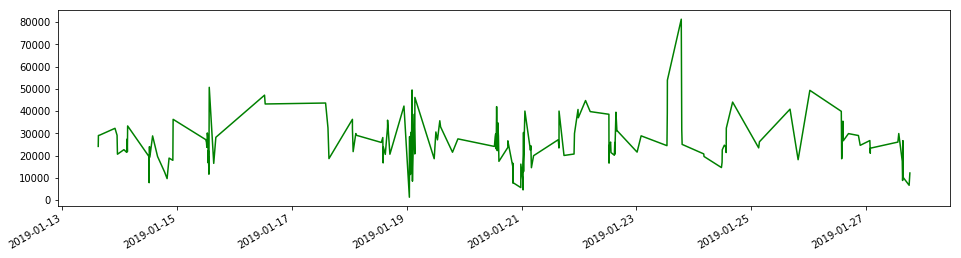

In [6]:
least_popular_tweet = np.min(table.retweets)
least_popular_tweet_text = (table[table.retweets == least_popular_tweet]).tweets
print(least_popular_tweet_text)

popular_tweets_graph = pd.Series(index =table["Time Created"].values, data=table["retweets"].values)
popular_tweets_graph.plot(figsize=(16,4), color="green")

In [7]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
     '''
      Utility function to clean the text in a tweet by removing 
      links and special characters using regex.
     '''  
    
     return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0 
    else:
        return -1 
    
table["Sentiment Analysis"] = np.array([analyze_sentiment(tweet) for tweet in table["tweets"]])

In [8]:
positive_tweets = [tweet for index, tweet in enumerate(table["Sentiment Analysis"]) if table["Sentiment Analysis"][index] > 0]
negative_tweets = [tweet for index, tweet in enumerate(table["Sentiment Analysis"]) if table["Sentiment Analysis"][index] < 0]
neutral_tweets = [tweet for index, tweet in enumerate(table["Sentiment Analysis"]) if table["Sentiment Analysis"][index] == 0]

print("percentage of positive tweets is {}".format(len(positive_tweets)/len(table["tweets"])*100))
print("percentage of negative tweets is {}".format(len(negative_tweets)/len(table["tweets"])*100))
print("percentage of neutral tweets is {}".format(len(neutral_tweets)/len(table["tweets"])*100))

percentage of positive tweets is 48.0
percentage of negative tweets is 18.0
percentage of neutral tweets is 34.0
